# Pseudo-Truth fit
This uses the proper `scale` factor to initialize each binned fit at the right starting location. So each bin begins at the solid "truth" line.

In [6]:
import pandas as pd

from pathlib import Path
import sys, os
parent_dir = str(Path().resolve().parents[3])
sys.path.insert(0, parent_dir)
import analysis.scripts.pwa_tools as pwa_tools

In [7]:
data_path = f"{parent_dir}/analysis/input-output-tests/0m_1m_1p/mcthrown"

df = pd.read_csv(f"{data_path}/pseudo-truth.csv", index_col="index")
df_data = pd.read_csv(f"{data_path}/thrown_data.csv")
df_truth = pd.read_csv(f"{data_path}/truth.csv", index_col="index")

plotter = pwa_tools.Plotter(df, df_data, truth_df=df_truth)

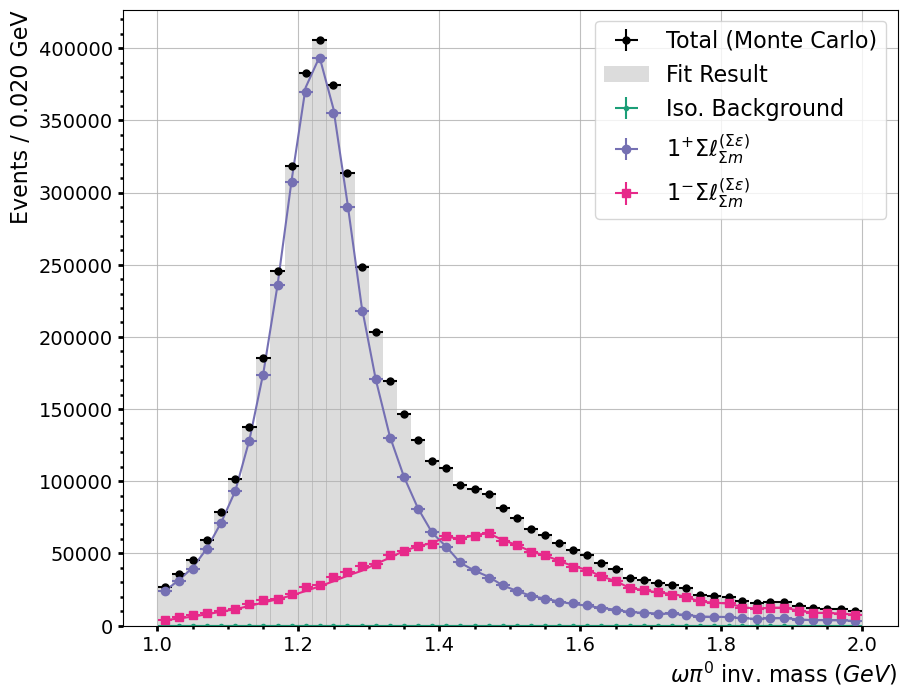

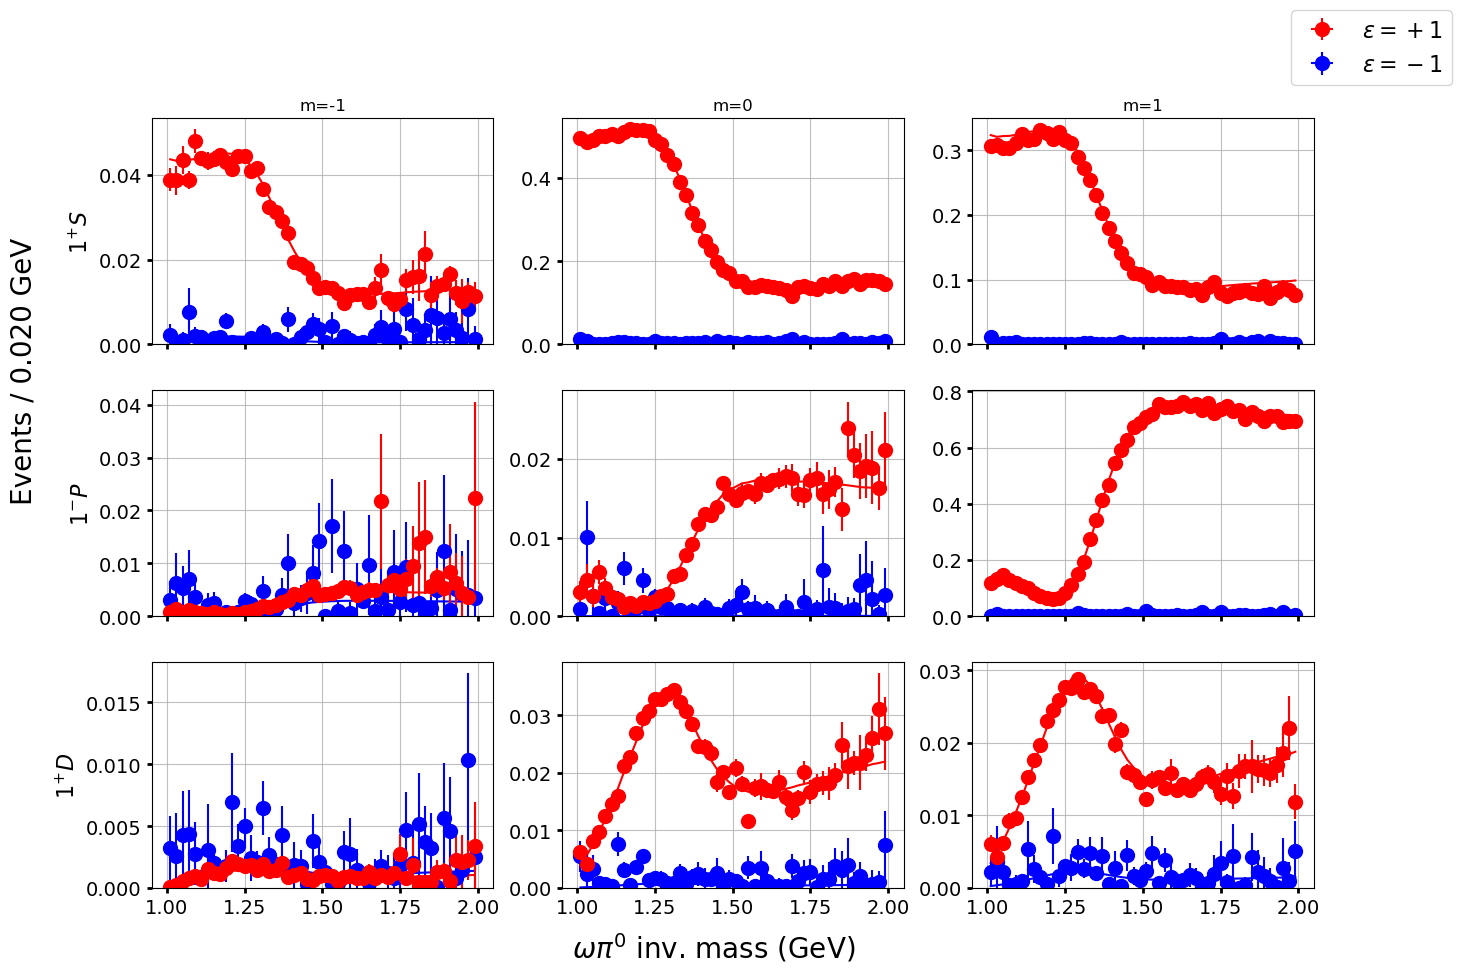

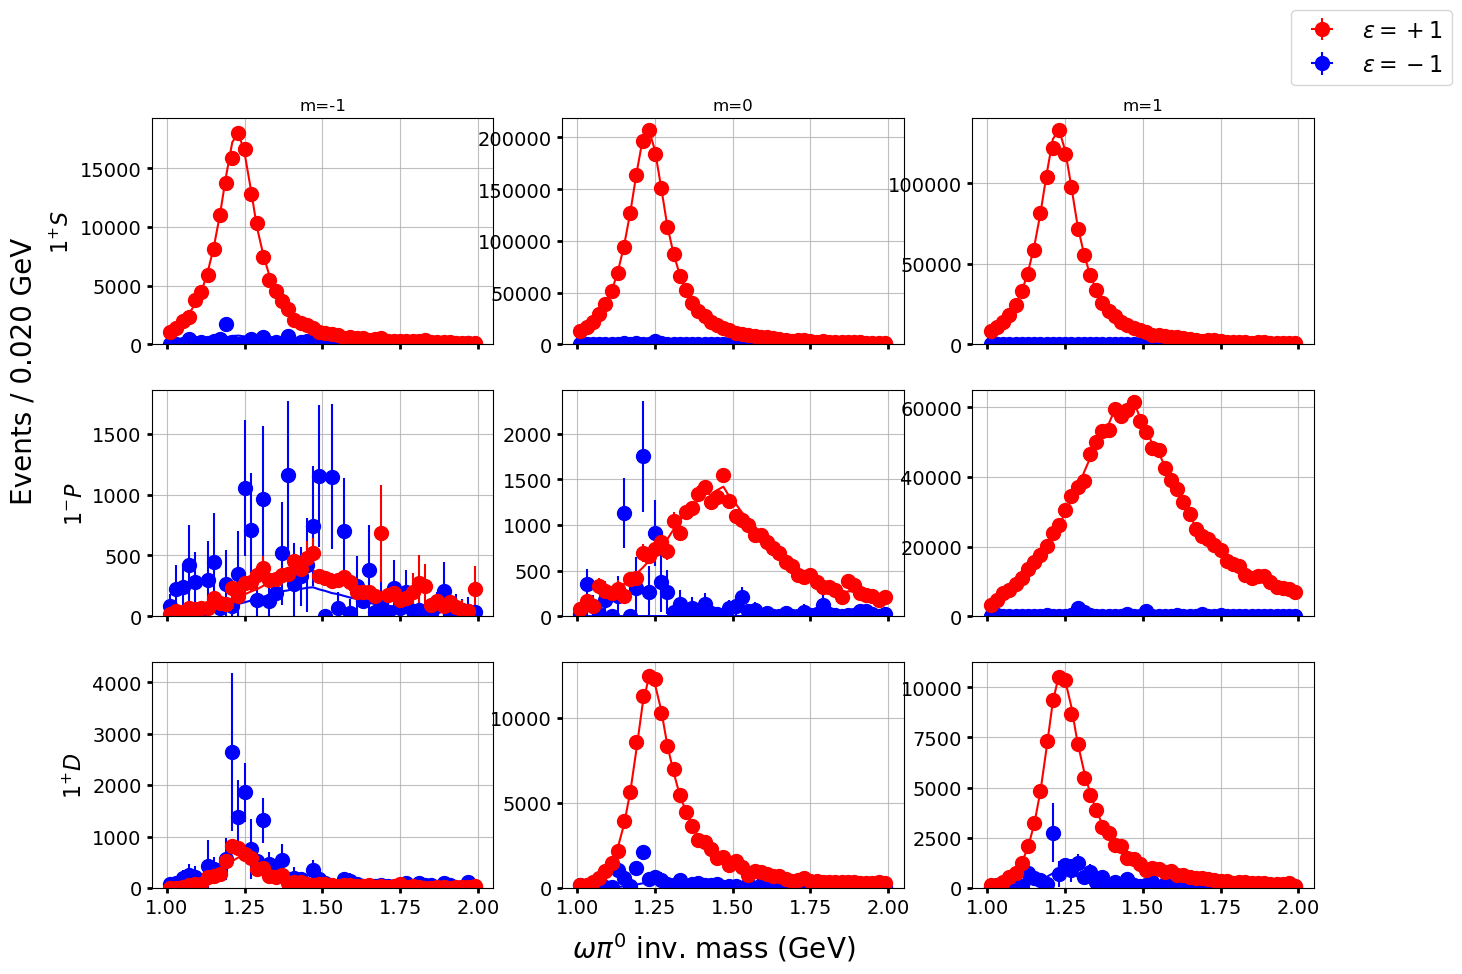

In [16]:
plotter.jp(data_label="Total (Monte Carlo)")
plotter.intensities(is_fit_fraction=True)
plotter.intensities()

Oh thank god it works. Okay now we can we start going down the list to figure out where between the two extrema (thrown results <--> reconstructed w/ background subtraction) the issues arise

# Randomized Fits

In [8]:
df_best = pd.read_csv(f"{data_path}/best_fits.csv", index_col="index")
plotter_best = pwa_tools.Plotter(df_best, df_data, truth_df=df_truth)

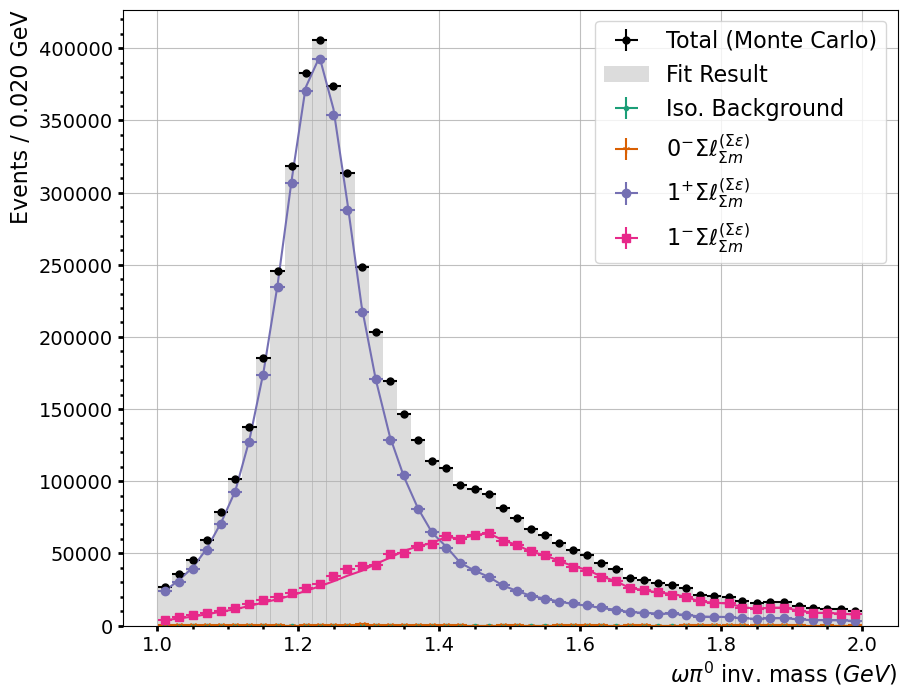

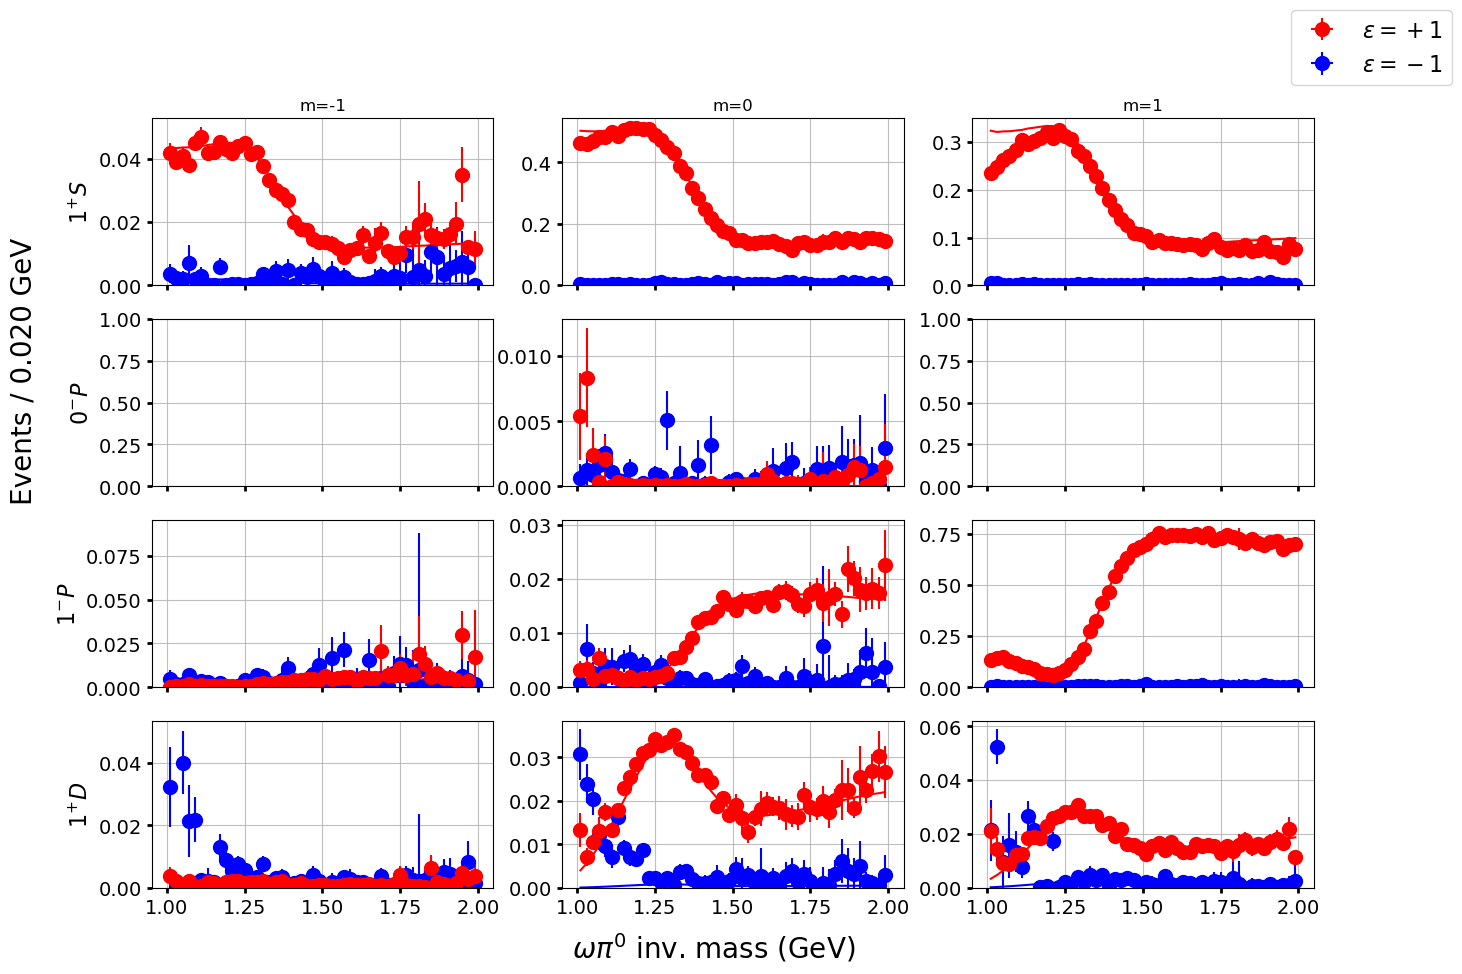

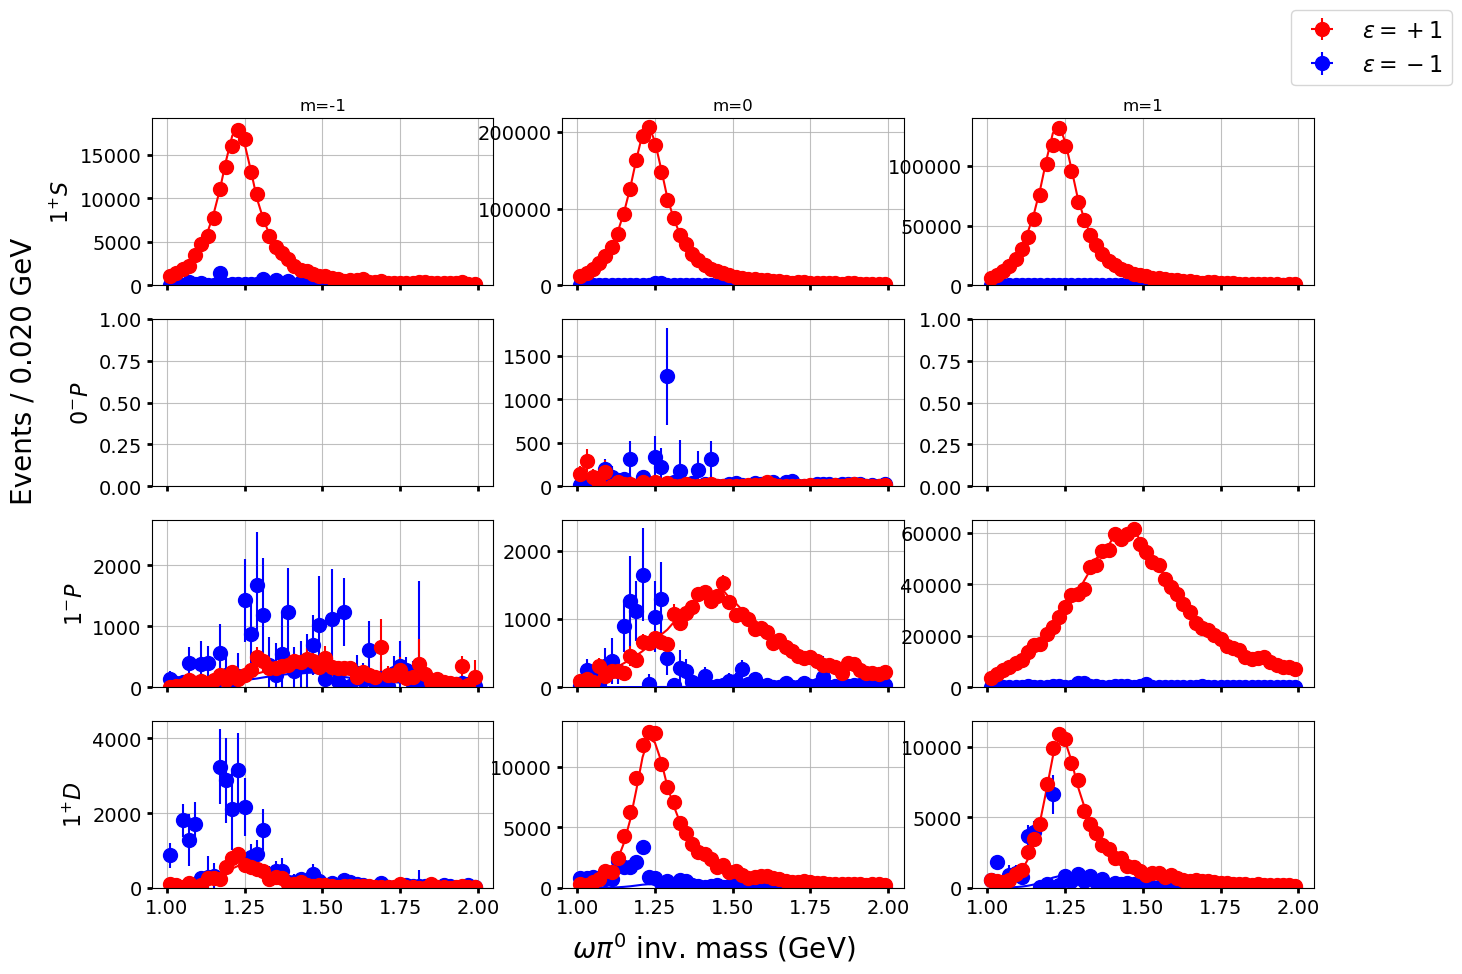

In [15]:
plotter_best.jp(data_label="Total (Monte Carlo)")
plotter_best.intensities(is_fit_fraction=True)
plotter_best.intensities()

bootstrap fits did not have enough time to converge, but these randomized fits look good enough to convince me that the detector affects are the root of the instability issue. Will need to peel back those effects to understand whats going on